In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('spam.tsv',sep='\t')

In [3]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
## it can be seen that the data is highly imbalanced and may bias in favor of 'ham'

In [8]:
## So we balance the data 

In [12]:
ham=data[data['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [13]:
spam=data[data['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [15]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [18]:
## we take same number of rows in ham aswell

In [16]:
ham=ham.sample(spam.shape[0])

In [17]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [20]:
df_updated=ham.append(spam,ignore_index = True)
df_updated.head()
df_updated.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [21]:
## performing some EDA( exploratory data analysis)

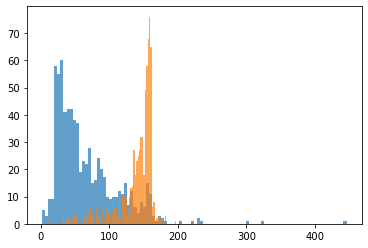

In [32]:
plt.hist(df_updated[df_updated['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(df_updated[df_updated['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

In [33]:
## it can be observed over here that 'ham' messages have word count less than 70 , but for spam it is more than 100 sometimes

In [34]:
## Data preparation

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

In [39]:
## here we implement the problem statement using BOW concept and TF-idf vectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(df_updated['message'],df_updated['label'],test_size=0.3,shuffle=True,random_state=0,stratify=df_updated['label'])

In [44]:
## BOW creation using the sklearn vectorizer

In [52]:
vectorizer=TfidfVectorizer()

In [ ]:
X_train=vectorizer.fit_transform(X_train)

In [ ]:
X_train.shape

In [54]:
## sklearn creates a sparse matrix for us 

In [56]:
## Pipeline and applying RandomForest classifier

In [61]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1,))])

In [62]:
clf.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [63]:
y_pred=clf.predict(X_test)

In [64]:
confusion_matrix(Y_test,y_pred)

array([[224,   1],
       [ 23, 201]], dtype=int64)

In [65]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       225
        spam       1.00      0.90      0.94       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [66]:
accuracy_score(Y_test,y_pred)

0.9465478841870824

In [67]:
clf.predict(['Hi this is Atharva '])

array(['ham'], dtype=object)

In [85]:
## Pipeline applying Supprt Vector Classifier

In [76]:
clf1=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=100,gamma='auto'))])

In [77]:
clf1.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=100, gamma='auto'))])

In [78]:
y_pred=clf1.predict(X_test)

In [79]:
confusion_matrix(Y_test,y_pred)

array([[223,   2],
       [ 31, 193]], dtype=int64)

In [80]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.88      0.99      0.93       225
        spam       0.99      0.86      0.92       224

    accuracy                           0.93       449
   macro avg       0.93      0.93      0.93       449
weighted avg       0.93      0.93      0.93       449



In [81]:
accuracy_score(Y_test,y_pred)

0.9265033407572383

In [82]:
clf1.predict(['Hi this is Atharva '])

array(['ham'], dtype=object)

In [84]:
clf1.predict(['lottery won of 1000$ '])

array(['spam'], dtype=object)